# Supervised Learning for Flood Prediction (Beginner Friendly)

This notebook demonstrates a supervised learning approach to predict flood probability. We'll use the data provided to learn patterns and make predictions about flood risk.

In [8]:
# First, we import the tools we need
import pandas as pd  # For handling our data
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # To split our data
from sklearn.ensemble import RandomForestRegressor  # Our prediction model
from sklearn.metrics import mean_squared_error, r2_score  # To evaluate our model
import matplotlib.pyplot as plt  # For making charts
import seaborn as sns  # For prettier charts

# We set a random seed to make our results reproducible
np.random.seed(42)

## Step 1: Loading and Exploring Our Data

First, we need to look at our data to understand what we're working with.

In [9]:
# Load the data from our CSV file
data = pd.read_csv('flood_kaggle.csv')

# Let's look at the first few rows of our data
print("Here are the first few rows of our data:")
print(data.head())

# And get some basic information about our dataset
print("\nHere's some information about our dataset:")
print(data.info())

# This gives us an overview of our dataset. We can see all the factors that might influence flood probability,
# like MonsoonIntensity, TopographyDrainage, etc., and our target variable 'FloodProbability' at the end.

Here are the first few rows of our data:
   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   Encroachments  ...

## Step 2: Preparing Our Data

In supervised learning, we split our data into two parts:
1. The features (X) - all the factors that might influence flooding
2. The target (y) - the flood probability we want to predict

In [10]:
# Separate our features (X) and target variable (y)
X = data.drop('FloodProbability', axis=1)  # All columns except FloodProbability
y = data['FloodProbability']  # Just the FloodProbability column

# Now we split our data into training and testing sets
# We'll use 80% of the data to train our model, and 20% to test it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"We have {X_train.shape[0]} samples to train our model")
print(f"And {X_test.shape[0]} samples to test it")

# This split allows us to train our model on one set of data and then test how well it performs on data it hasn't seen before.
# This helps us understand if our model can generalize to new situations, which is crucial for predicting flood risk in various areas.

We have 40000 samples to train our model
And 10000 samples to test it


## Step 3: Training Our Model

Now we'll use a Random Forest model to learn patterns from our training data. Think of this like the model studying many examples of flood scenarios to understand what factors lead to higher flood probabilities.

In [11]:
# Create our Random Forest model
# n_estimators=100 means it will create 100 decision trees to make its predictions
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on our training data
model.fit(X_train, y_train)

print("Our model has finished learning from the training data!")

# The model has now learned patterns from the training data. It's like it has studied many past flood scenarios
# and understands how different factors (like monsoon intensity, topography, etc.) relate to flood probability.

Our model has finished learning from the training data!


## Step 4: Evaluating Our Model

Now that our model has learned, let's see how well it can predict flood probabilities for data it hasn't seen before.

In [12]:
# Use our trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Calculate how well our predictions match the actual values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# The Mean Squared Error (MSE) tells us how far off our predictions are on average. Lower is better.
# The R-squared score tells us how well our model explains the variability in flood probability. Closer to 1 is better.
# These metrics help us understand how reliable our flood predictions might be for new areas or future scenarios.

Mean Squared Error: 0.0007
R-squared Score: 0.7295


## Step 5: Understanding Important Factors

One of the benefits of our model is that it can tell us which factors are most important in predicting flood probability.

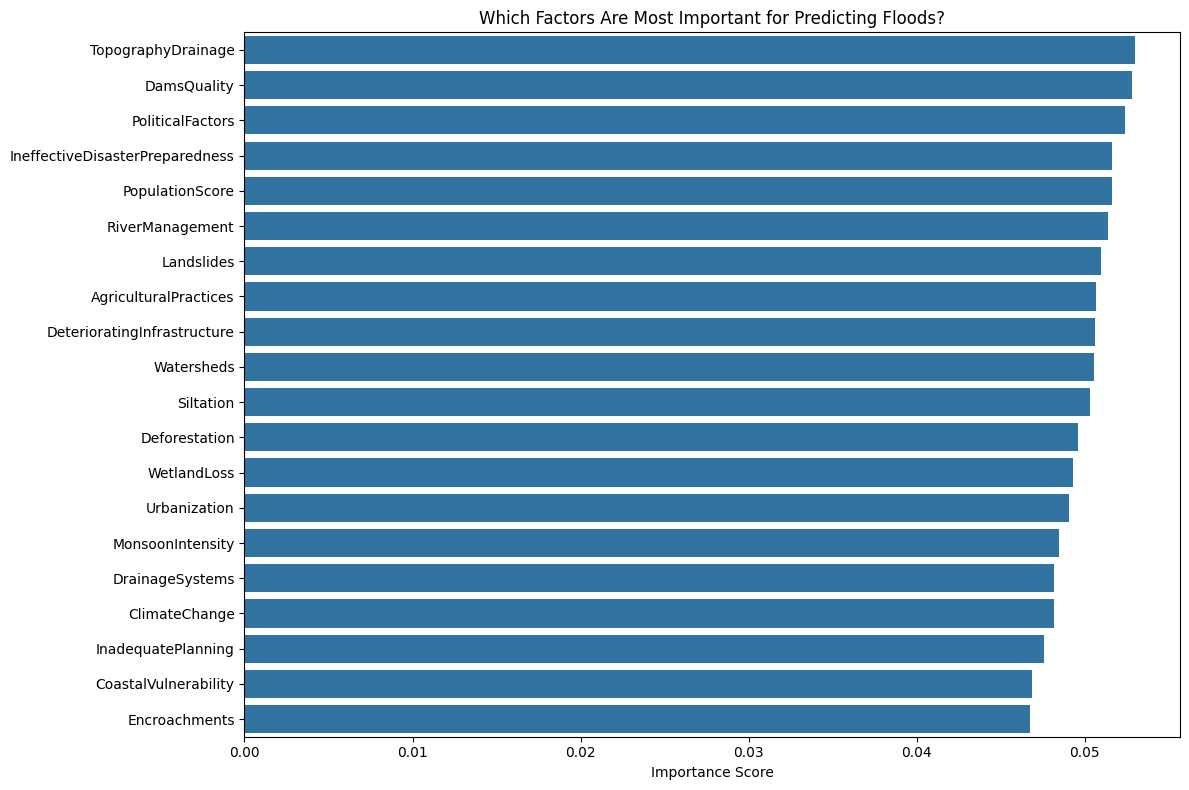

The 5 most important factors for predicting flood probability are:
TopographyDrainage: 0.0530
DamsQuality: 0.0528
PoliticalFactors: 0.0524
IneffectiveDisasterPreparedness: 0.0516
PopulationScore: 0.0516


In [13]:
# Get the importance of each feature
feature_importance = model.feature_importances_
features = X.columns

# Sort features by importance
feature_importance_sorted = sorted(zip(feature_importance, features), reverse=True)

# Create a bar chart of feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=[imp for imp, _ in feature_importance_sorted], 
            y=[feat for _, feat in feature_importance_sorted])
plt.title("Which Factors Are Most Important for Predicting Floods?")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# Print the top 5 most important factors
print("The 5 most important factors for predicting flood probability are:")
for imp, feat in feature_importance_sorted[:5]:
    print(f"{feat}: {imp:.4f}")

# This analysis helps us understand which factors contribute most to flood risk.
# It could guide where to focus flood prevention efforts or what to monitor most closely for early warning systems.

## Conclusion

We've now built a model that can predict flood probability based on various environmental factors. This model could be used to:
1. Estimate flood risk for new areas
2. Identify the most critical factors contributing to flood risk
3. Guide decision-making for flood prevention and preparedness

Remember, this is a simplified model and real-world flood prediction is very complex. But this gives us a starting point for understanding and predicting flood risks.